# Exploring errors obtained with different modelling approaches in segments of the data

## For public healthcare dataset

Abbreviations used throught these notebook:
 - OLS Oridnary Least-Squares regression
 - VAR Vector Auto Regression
 - ANN Arificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# Some file paths
folder_with_results = 'model_compare'

OLS_res_path = folder_with_results+'/res_OLS.csv'
VAR_res_path = folder_with_results+'/res_VAR.csv'
ANN_res_path = folder_with_results+'/res_ANN.csv'

In [5]:
def plot_predict_vs_target(target,predicted,title):
    """Prints the actual versus predicted values"""
    plt.figure(figsize=(5, 5))
    plt.scatter(target,predicted, alpha=0.5)
    
    lims = [
    np.min([np.min(predicted), np.min(target)]),  # min of both axes
    np.max([np.max(predicted), np.max(target)]),  # max of both axes
    ]
    
    plt.plot(lims, lims, 'k-', alpha=0.50, zorder=0)
    #plt.xlim(lims)
    #plt.ylim(lims)
    
    plt.xlabel('Target')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid()
    plt.show()

In [6]:
def add_to_summary(segment_summary,res,masks,loc_target,loc_res,feature_target,model):
    for idx,mask in enumerate(masks):
        segment     = idx+1
        #
        target_mean = np.mean(res[mask])
        target_std  = np.std(res[mask])
        #
        MAE = mae(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res]) 
        MSE = mse(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res])
        #
        q25 = res[mask][feature_target].quantile(0.25)
        q50 = res[mask][feature_target].quantile(0.50)
        q75 = res[mask][feature_target].quantile(0.75)
        #
        q25_mask = res[mask][feature_target] < q25
        q50_mask = (res[mask][feature_target] >= q25) & (res[mask][feature_target] < q50)
        q75_mask = res[mask][feature_target] < q75
        #
        res_25 = res[mask][q25_mask]
        res_50 = res[mask][q50_mask]
        res_75 = res[mask][q75_mask]
        #
        MAE_25 = mae(res_25.iloc[:,loc_target],res_25.iloc[:,loc_res])
        MAE_50 = mae(res_50.iloc[:,loc_target],res_50.iloc[:,loc_res])
        MAE_75 = mae(res_75.iloc[:,loc_target],res_75.iloc[:,loc_res]) 
        row = pd.Series([model,segment,target_mean[1],target_std[1],MAE,MSE,MAE_25,MAE_50,MAE_75],index=columns)
        segment_summary = segment_summary.append(row,ignore_index=True)
    return segment_summary   

### Segmenting OLS predictions
The Ordinary least-squares regresssions results will be inspected.

In [7]:
res_OLS = pd.read_csv(OLS_res_path)

Entire set of predictions:


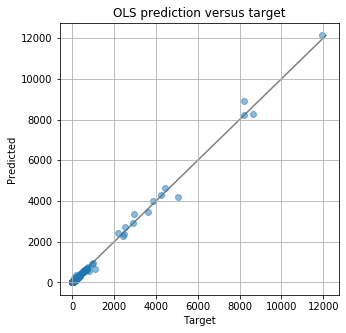

,IQ_TOTAL_REV_target,IQ_TOTAL_REV_OLS
count,421.000000,421.000000
mean,238.191060,241.858747
std,1058.882502,1067.334558
min,-0.170399,3.292668
25%,1.245157,4.648973
50%,6.283508,9.968627
75%,55.955925,55.983880
max,11949.044000,12133.755023


In [8]:
print("Entire set of predictions:")

x1 = res_OLS['IQ_TOTAL_REV_target']
x2 = res_OLS['IQ_TOTAL_REV_OLS']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)


res_OLS.describe()

In [9]:
mask1 = res_OLS['IQ_TOTAL_REV_target'] < 5
mask2 = (res_OLS['IQ_TOTAL_REV_target'] >= 5 ) & (res_OLS['IQ_TOTAL_REV_target'] < 10 )
mask3 = (res_OLS['IQ_TOTAL_REV_target'] >= 10 ) & (res_OLS['IQ_TOTAL_REV_target'] < 100 )
mask4 = (res_OLS['IQ_TOTAL_REV_target'] >= 100)

### Segment 1:  Revenue  < 5 

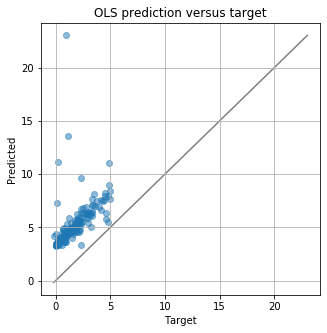

,IQ_TOTAL_REV_target,IQ_TOTAL_REV_OLS
count,197.000000,197.000000
mean,1.514263,5.059745
std,1.289439,2.030540
min,-0.170399,3.292668
25%,0.482370,3.829510
50%,1.089387,4.531528
75%,2.182333,5.670351
max,4.978735,23.009233


In [10]:
x1 = res_OLS[mask1]['IQ_TOTAL_REV_target']
x2 = res_OLS[mask1]['IQ_TOTAL_REV_OLS']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_OLS[mask1].describe()

### Segment 2: 5 < Revenue  < 10

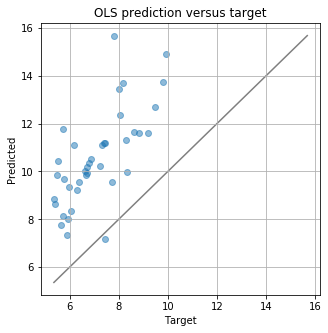

,IQ_TOTAL_REV_target,IQ_TOTAL_REV_OLS
count,39.000000,39.000000
mean,7.102534,10.567211
std,1.302231,1.985027
min,5.363500,7.193667
25%,5.969821,9.450881
50%,6.779742,10.222664
75%,8.022334,11.603604
max,9.943946,15.674583


In [13]:
x1 = res_OLS[mask2]['IQ_TOTAL_REV_target']
x2 = res_OLS[mask2]['IQ_TOTAL_REV_OLS']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_OLS[mask2].describe()

### Segment 3:  10 < Revenue  < 100

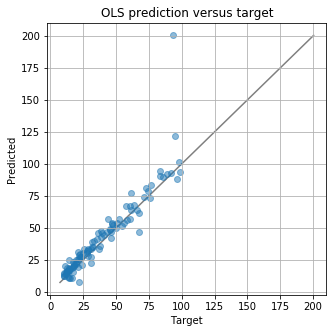

,IQ_TOTAL_REV_target,IQ_TOTAL_REV_OLS
count,105.000000,105.000000
mean,38.321513,42.141538
std,25.054410,29.663497
min,10.188500,7.383969
25%,17.206806,20.410211
50%,30.736500,33.326678
75%,54.595078,54.123050
max,98.627070,200.375380


In [14]:
x1 = res_OLS[mask3]['IQ_TOTAL_REV_target']
x2 = res_OLS[mask3]['IQ_TOTAL_REV_OLS']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_OLS[mask3].describe()

### Segment 4: Revenue  > 100

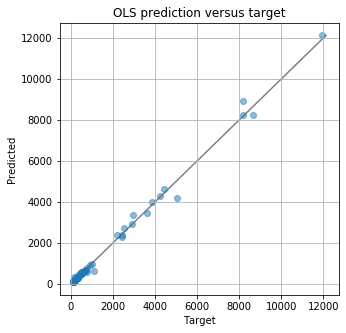

,IQ_TOTAL_REV_target,IQ_TOTAL_REV_OLS
count,80.000000,80.000000
mean,1195.992109,1199.859748
std,2193.629649,2215.110773
min,105.641460,75.135404
25%,182.778375,204.190121
50%,310.062750,319.535290
75%,721.363400,657.761712
max,11949.044000,12133.755023


In [15]:
x1 = res_OLS[mask4]['IQ_TOTAL_REV_target']
x2 = res_OLS[mask4]['IQ_TOTAL_REV_OLS']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_OLS[mask4].describe()

The OLS model is fitted mostly to the entries with high revenue. This is expected as larger values will have stronger impact on the least-squares loss functions.

In [16]:
columns = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
segment_summary = pd.DataFrame(columns=columns)

In [20]:
res        = res_OLS
masks      = [mask1,mask2,mask3,mask4]
loc_target = 2
loc_res    = 3
model      = 'OLS'
columns    = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
feature_target  = 'IQ_TOTAL_REV_target'
segment_summary = pd.DataFrame(columns=columns)

segment_summary = add_to_summary(segment_summary,res,masks,loc_target,loc_res,feature_target,model)

In [21]:
segment_summary

,Model,Segment,Target_Mean,Target_Std,MAE,MSE,MAE_25,MAE_50,MAE_75
0,OLS,1,5.059745,2.025380,3.545482,15.455050,3.606545,3.739035,3.623962
1,OLS,2,10.567211,1.959413,3.478314,13.956624,3.399631,3.323840,3.475098
2,OLS,3,42.141538,29.521905,6.026492,148.636787,3.846132,4.636195,4.488516
3,OLS,4,1199.859748,2201.222794,72.663423,25731.901592,22.659710,16.790111,21.964588


IQ_TOTAL_REV for healthcare pricate data (for comparison):
count      745.000000
mean       102.703220
std        608.802864
min          0.836000
25%          9.365349
50%         18.654000
75%         36.879013
max      11216.570000

### Segmenting VAR predictions
The VAR results will be inspected.


In [22]:
res_VAR = pd.read_csv(VAR_res_path)

Entire set of predictions:


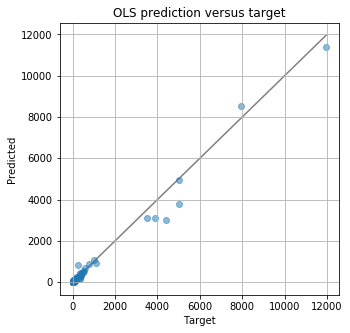

,IQ_TOTAL_REV_VAR_targ,IQ_TOTAL_REV_VAR_norm
count,147.000000,147.000000
mean,365.911864,342.271741
std,1405.828530,1330.214666
min,0.005083,-13.061582
25%,1.996186,2.024935
50%,8.864817,8.594043
75%,102.875645,100.460580
max,11949.044000,11381.244060


In [23]:
print("Entire set of predictions:")

x1 = res_VAR['IQ_TOTAL_REV_VAR_targ']
x2 = res_VAR['IQ_TOTAL_REV_VAR_norm']
title ='OLS prediction versus target'
plot_predict_vs_target(x1,x2,title)


res_VAR.describe()

In [24]:
mask1 = res_VAR['IQ_TOTAL_REV_VAR_targ'] < 5
mask2 = (res_VAR['IQ_TOTAL_REV_VAR_targ'] >= 5 ) & (res_VAR['IQ_TOTAL_REV_VAR_targ'] < 10 )
mask3 = (res_VAR['IQ_TOTAL_REV_VAR_targ'] >= 10 ) & (res_VAR['IQ_TOTAL_REV_VAR_targ'] < 100 )
mask4 = (res_VAR['IQ_TOTAL_REV_VAR_targ'] >= 100)

### Segment 1:  Revenue  < 5 

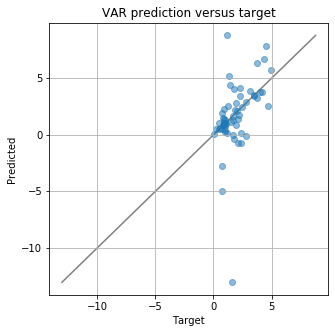

,IQ_TOTAL_REV_VAR_targ,IQ_TOTAL_REV_VAR_norm
count,59.000000,59.000000
mean,1.875536,1.705682
std,1.237419,3.056403
min,0.005083,-13.061582
25%,0.923235,0.536752
50%,1.650425,1.415190
75%,2.360176,3.322591
max,4.946654,8.788992


In [25]:
x1 = res_VAR[mask1]['IQ_TOTAL_REV_VAR_targ']
x2 = res_VAR[mask1]['IQ_TOTAL_REV_VAR_norm']
title ='VAR prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_VAR[mask1].describe()

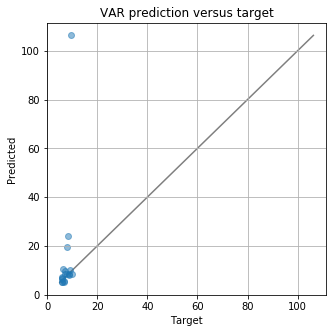

,IQ_TOTAL_REV_VAR_targ,IQ_TOTAL_REV_VAR_norm
count,18.000000,18.000000
mean,7.410321,14.719333
std,1.351894,23.368841
min,5.737980,5.026068
25%,6.152281,6.703203
50%,7.117845,8.424409
75%,8.514919,10.038034
max,9.796964,106.296506


In [26]:
x1 = res_VAR[mask2]['IQ_TOTAL_REV_VAR_targ']
x2 = res_VAR[mask2]['IQ_TOTAL_REV_VAR_norm']
title ='VAR prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_VAR[mask2].describe()

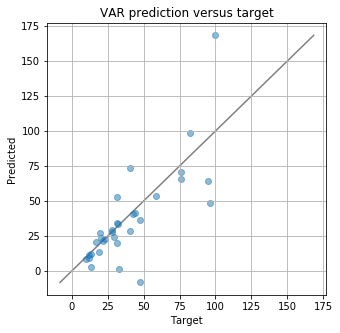

,IQ_TOTAL_REV_VAR_targ,IQ_TOTAL_REV_VAR_norm
count,38.000000,38.000000
mean,1375.567665,1283.429380
std,2526.898531,2398.636620
min,101.301290,75.809162
25%,178.689898,159.653473
50%,355.943070,331.672089
75%,736.909650,856.321939
max,11949.044000,11381.244060


In [27]:
x1 = res_VAR[mask3]['IQ_TOTAL_REV_VAR_targ']
x2 = res_VAR[mask3]['IQ_TOTAL_REV_VAR_norm']
title ='VAR prediction versus target'
plot_predict_vs_target(x1,x2,title)

res_VAR[mask4].describe()

In [28]:
res        = res_VAR
masks      = [mask1,mask2,mask3,mask4]
loc_target = 1
loc_res    = 2
columns = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
feature_target  = 'IQ_TOTAL_REV_VAR_targ'
model = 'VAR'
#segment_summary = pd.DataFrame(columns=columns)

for idx,mask in enumerate(masks):
    segment     = idx+1
    #
    target_mean = np.mean(res[mask])
    target_std  = np.std(res[mask])
    #
    MAE = mae(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res]) 
    MSE = mse(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res])
    #
    q25 = res[mask][feature_target].quantile(0.25)
    q50 = res[mask][feature_target].quantile(0.50)
    q75 = res[mask][feature_target].quantile(0.75)
    #
    q25_mask = res[mask][feature_target] < q25
    q50_mask = (res[mask][feature_target] >= q25) & (res[mask][feature_target] < q50)
    q75_mask = res[mask][feature_target] < q75
    #
    res_25 = res[mask][q25_mask]
    res_50 = res[mask][q50_mask]
    res_75 = res[mask][q75_mask]
    #
    MAE_25 = mae(res_25.iloc[:,loc_target],res_25.iloc[:,loc_res])
    MAE_50 = mae(res_50.iloc[:,loc_target],res_50.iloc[:,loc_res])
    MAE_75 = mae(res_75.iloc[:,loc_target],res_75.iloc[:,loc_res]) 
    row = pd.Series([model,segment,target_mean[1],target_std[1],MAE,MSE,MAE_25,MAE_50,MAE_75],index=columns)
    segment_summary = segment_summary.append(row,ignore_index=True)

In [29]:
segment_summary.set_index(['Model','Segment'])

Target_Mean   Target_Std         MAE            MSE     MAE_25  \
Model Segment                                                                   
OLS   1           5.059745     2.025380    3.545482      15.455050   3.606545   
      2          10.567211     1.959413    3.478314      13.956624   3.399631   
      3          42.141538    29.521905    6.026492     148.636787   3.846132   
      4        1199.859748  2201.222794   72.663423   25731.901592  22.659710   
VAR   1           1.705682     3.030390    1.454688       7.295992   0.974498   
      2          14.719333    22.710431    7.917414     544.616668   0.873985   
      3          36.813944    33.242042   12.913705     459.756297   4.244235   
      4        1283.429380  2366.865196  177.967934  137481.348762  12.906341   

                   MAE_50     MAE_75  
Model Segment                         
OLS   1          3.739035   3.623962  
      2          3.323840   3.475098  
      3          4.636195   4.488516  
      4         16.790111  21.964588  
VAR   1          2.415159   1.513237  
      2          2.008704   3.284158  
      3          3.093441   9.128441  
      4        110.265986  51.937763